In [24]:
import numpy as np
from scipy.integrate import solve_bvp
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Define initialization function
def initialize_all(a,b,y0,h):
    """
    Given an initial and final time a and b, with y(a)=y0, and step size h,
     return several things.
    X: an aray from a to b with n elements, where n is the number of steps from a to b.
    Y: an empty array of size (n, y.size), Y[0]=y0.
    h: the step size.
    n: the number of steps to be taken.
    """
    n = int((b-a)/h+1)
    X = np.linspace(a, b, n)
    if isinstance(y0, np.ndarray):
        Y = np.empty((n, y0.size))
    else:
        Y = np.empty(n)
    Y[0] = y0
    return X, Y, h, int(n)

# Define RK4 method
def RK4(f,X,Y,h,n) :
    for i in range(len(X[1:])) :
        K1 = f(X[i],Y[i])
        K2 = f(X[i]+h/2.,Y[i]+h/2.*K1)
        K3 = f(X[i]+h/2.,Y[i]+h/2.*K2)
        K4 = f(X[i+1],Y[i]+h*K3)
        Y[i+1] = Y[i] + h/6.*(K1+2*K2+2*K3+K4)
    return Y

### Problem 1

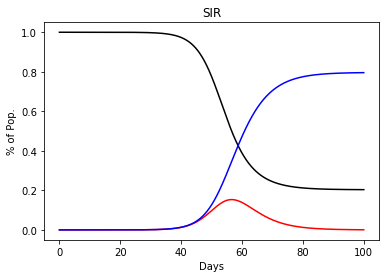

In [4]:
def ode_SIR(x,y) :
    return np.array([ -0.5*y[1]*y[0] , 0.5*y[1]*y[0]-0.25*y[1] , 0.25*y[1]])

a = 0
b = 100
h = 0.1
S0 = 1-6.25*10**-7
I0 = 6.25*10**-7
R0 = 0
y0 = np.array([S0,I0,R0]).reshape(1,3)
X, Y, h, n = initialize_all(a,b,y0,h)
Y = RK4(ode_SIR,X,Y,h,n)
plt.plot(X,Y[:,0],'-k',label="S")
plt.plot(X,Y[:,1],'-r',label="I")
plt.plot(X,Y[:,2],'-b',label="R")
plt.xlabel('Days')
plt.ylabel('% of Pop.')
plt.title('SIR')
plt.show()

### Problem 2

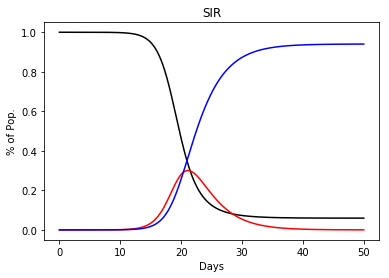

Approximately 1904950 can work.


In [19]:
def ode_SIR_2(x,y) :
    return np.array([ -y[1]*y[0] , y[1]*y[0] - y[1]/3., y[1]/3.])

a = 0
b = 50
h = 0.1
S0 = 1 - (5./3000000)
I0 = 5./3000000
R0 = 0
y0 = np.array([S0,I0,R0])
X, Y, h, n = initialize_all(a,b,y0,h)
Y = RK4(ode_SIR_2,X,Y,h,n)
plt.plot(X,Y[:,0],'-k',label="S")
plt.plot(X,Y[:,1],'-r',label="I")
plt.plot(X,Y[:,2],'-b',label="R")
plt.xlabel('Days')
plt.ylabel('% of Pop.')
plt.title('SIR')
plt.show()
infected = list(Y[:,1])
i = infected.index(max(infected))
print("Approximately "+str(int(3000000*(Y[i,0]+Y[i,1])))+" can work.")

### Problem 3

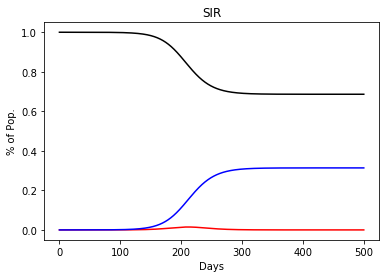

In [15]:
pop = 3000000
sick = 5.
beta = 3./10 # Spread rate
gamma = 1./4 # Recovery rate

def ode_SIR_3(x,y) :
    return np.array([ -beta*y[1]*y[0] , beta*y[1]*y[0] - gamma*y[1], gamma*y[1]])

a = 0
b = 500
h = 0.1
S0 = 1 - (sick/pop)
I0 = sick/pop
R0 = 0
y0 = np.array([S0,I0,R0])
X, Y, h, n = initialize_all(a,b,y0,h)
Y = RK4(ode_SIR_3,X,Y,h,n)
plt.plot(X,Y[:,0],'-k',label="S")
plt.plot(X,Y[:,1],'-r',label="I")
plt.plot(X,Y[:,2],'-b',label="R")
plt.xlabel('Days')
plt.ylabel('% of Pop.')
plt.title('SIR')
plt.show()

### Problem 4

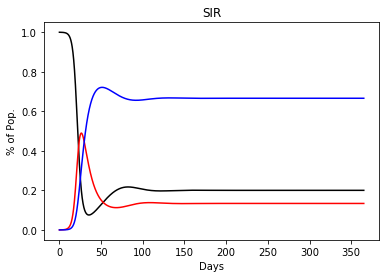

In [21]:
f = 1./50 # Loss of Immunity rate
mu = 0.0001 # Birth rate
beta = 1./2 # Spread rate
gamma = 1./10 # Recovery rate

def ode_SIR_2(x,y) :
    return np.array([ f*y[2]+mu*(1-y[0])-beta*y[1]*y[0] , beta*y[1]*y[0] - (mu+gamma)*y[1], -(f+mu)*y[2]+gamma*y[1]])

a = 0
b = 365
h = 0.1
S0 = 1 - (1000./7000000)
I0 = 1000./7000000
R0 = 0
y0 = np.array([S0,I0,R0])
X, Y, h, n = initialize_all(a,b,y0,h)
Y = RK4(ode_SIR_2,X,Y,h,n)
plt.plot(X,Y[:,0],'-k',label="S")
plt.plot(X,Y[:,1],'-r',label="I")
plt.plot(X,Y[:,2],'-b',label="R")
plt.xlabel('Days')
plt.ylabel('% of Pop.')
plt.title('SIR')
plt.show()

### Problem 5

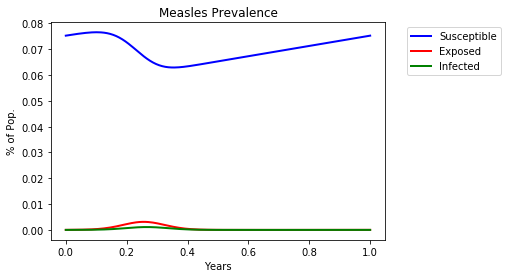

In [41]:
a = 0
b = 1
beta1 = 1
beta0 = 1575
beta = lambda t : beta0 * (1 + beta1*np.cos(2*np.pi*t))
eta = 0.01
lamb = 0.0279
mu = 0.02

def ode_bvp(t,y) :
    n = len(y[0])
    return np.array([mu-beta(t)*y[0]*y[2],beta(t)*y[0]*y[2]-y[1]/lamb, y[1]/lamb-y[2]/eta, 0*np.zeros(n), 0*np.zeros(n), 0*np.zeros(n)])

def bcs(ya,yb) :
    BCa = ya[0:3] - ya[3:]
    BCb = yb[0:3] - yb[3:]
    return np.hstack([BCa,BCb])

X = np.linspace(0,1,200)
Y = np.array([.07, .0001, .0001, .08, .0001, .0001]).reshape((-1,1))*np.ones((6,len(X)))

solution = solve_bvp(ode_bvp,bcs,X,Y)
S = solution.sol(X)[0]
E = solution.sol(X)[1]
I = solution.sol(X)[2]
plt.plot(X,S,'-b',linewidth=2,label="Susceptible")
plt.plot(X,E,'-r',linewidth=2,label="Exposed")
plt.plot(X,I,'-g',linewidth=2,label="Infected")
plt.xlabel("Years")
plt.ylabel("% of Pop.")
plt.title("Measles Prevalence")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()